# 🎓 SSNCE M.Tech (Integrated) CSE - CAT Assignment 1: Introduction to Machine Learning (ICS1502)

**Academic Year:** 2025-2026 (Odd) | **Batch:** 2023-2028n
## 🎯 Overall Objective

Implement Linear Regression and Linear Classification models from scratch using **matrix-based methods** (NumPy/Pandas) to critically evaluate their suitability for the given datasets. All code must be in **Python** (Jupyter Notebook).

## 1.1 Regression: Mobile Phone Price Prediction

**Dataset:** Mobile Phone Price Prediction (Loaded as `df`)

**Goal:** Implement Linear Regression using matrix algebra ($\mathbf{w} = (\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathbf{y}$) and Gradient Descent.

### Tasks:

1.  **Closed-Form Solution:** Implement Linear Regression using the **Normal Equation** (matrix inverse).
2.  **Gradient Descent (GD):** Implement Linear Regression using **Gradient Descent**.
3.  **Visualization:** Plot predicted vs. actual values on the **test data** for (1) and (2).
4.  **L2 Regularization (Ridge):** Repeat (1), (2), and (3) incorporating **L2 regularization** ($\lambda$).
5.  **Standardization Impact:** Compare the results of (4) **with and without** data standardization.
6.  **Lambda Plot:** Plot predicted vs. actual on test data for different $\lambda$ values.
7.  **Feature Importance:** Analyze feature importance based on the magnitude of **standardized $L_2$ weights**.

## 1.2 Linear Classification: Bank Note Authentication

**Dataset:** Bank Note Authentication

**Goal:** Implement a **Linear Classification Model** (e.g., Logistic Regression or a simple single-layered NN) using Gradient Descent for this binary classification problem.

### Tasks:

1.  **Data Split:** Divide the dataset into train and test sets.
2.  **L2 Comparison:** Fit the model **with and without L2 regularization** and compare test accuracies.
3.  **Accuracy Plot:** Plot training and test accuracy vs. the regularization parameter ($\lambda$).
4.  **Visualization (3D):** Visualize the data using a 3D plot of three important features.
5.  **Outlier Injection:** Intentionally introduce outliers into the training data.
6.  **Outlier Impact:** Fit the classifier on the outlier-injected data and comment on the change in performance.

---

## 🛠️ Setup & Libraries

```python
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## 1.1 Regression: Mobile Phone Price Prediction

Data Loading and Preparation

In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohannapd/mobile-price-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mobile-price-prediction' dataset.
Path to dataset files: /kaggle/input/mobile-price-prediction


In [25]:
import os

# List all files in the dataset folder
print(os.listdir(path))


['Cellphone.csv', 'Cellphone.xlsx']


In [26]:
import pandas as pd

df = pd.read_csv(os.path.join(path, 'Cellphone.csv'))  # adjust name if needed
print(df.head())


   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  


In [27]:
print(df.shape)
print(df.dtypes)


(161, 14)
Product_id        int64
Price             int64
Sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object


In [28]:
X = df.drop('Price', axis=1)
y = df['Price']

In [29]:
print(X.isnull().sum().sum())  # Number of null values

0


--- Data Analysis for Mobile Price Prediction (df) ---
Shape: (161, 14)
Features (excluding Price): ['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery']
Target Variable: thickness

--- Statistical Summary of Features & Target ---
              count         mean          std    min     25%      50%  \
Product_id    161.0   675.559006   410.851583   10.0   237.0   774.00   
Price         161.0  2215.596273   768.187171  614.0  1734.0  2258.00   
Sale          161.0   621.465839  1546.618517   10.0    37.0   106.00   
weight        161.0   170.426087    92.888612   66.0   134.1   153.00   
resoloution   161.0     5.209938     1.509953    1.4     4.8     5.15   
ppi           161.0   335.055901   134.826659  121.0   233.0   294.00   
cpu core      161.0     4.857143     2.444016    0.0     4.0     4.00   
cpu freq      161.0     1.502832     0.599783    0.0     1.2     1.40   
internal mem  161.0 

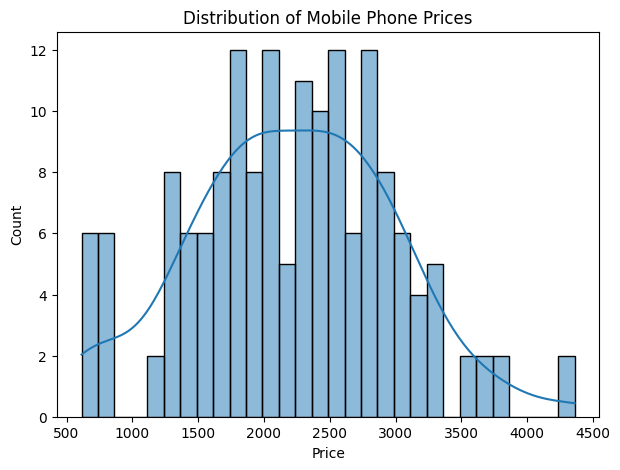


--- Correlation of Features with Price ---
Price           1.000000
ram             0.896915
ppi             0.817614
internal mem    0.776738
RearCam         0.739538
cpu freq        0.727383
cpu core        0.686811
Front_Cam       0.675286
battery         0.559946
resoloution     0.404010
Sale            0.273263
Product_id      0.165136
weight          0.144555
thickness      -0.716773
Name: Price, dtype: float64


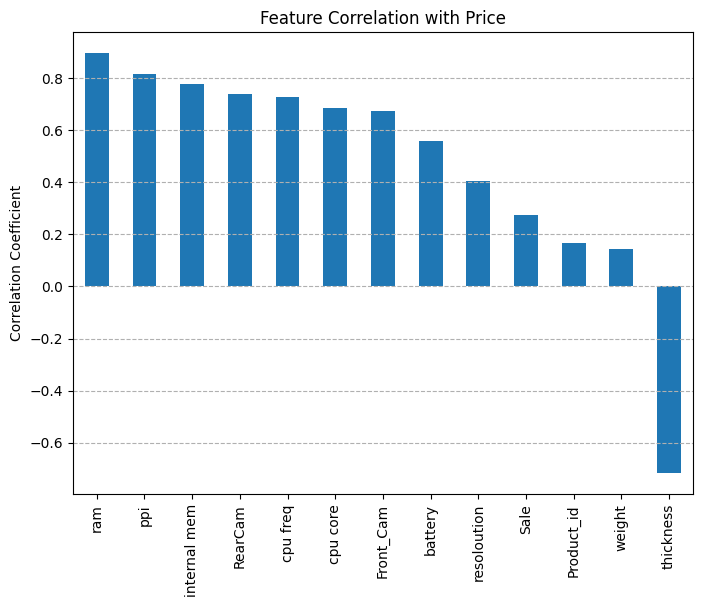


--- Feature Scale Check (Min/Max) ---
     Product_id  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
min          10    10    66.0          1.4  121         0       0.0   
max        1339  9807   753.0         12.2  806         8       2.7   

     internal mem  ram  RearCam  Front_Cam  battery  thickness  
min           0.0  0.0      0.0        0.0      800        5.1  
max         128.0  6.0     23.0       20.0     9500       18.5  


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains the Mobile Phone Price Prediction data with 'Price' as the target

print("--- Data Analysis for Mobile Price Prediction (df) ---")
print(f"Shape: {df.shape}")
print(f"Features (excluding Price): {df.columns[:-1].tolist()}")
print(f"Target Variable: {df.columns[-1]}")

# 1. Statistical Summary & Missing Values
print("\n--- Statistical Summary of Features & Target ---")
print(df.describe().T)
print("\nMissing Values Check:")
print(df.isnull().sum()) # Crucial check

# 2. Target Variable Distribution
print("\n--- Target Variable Distribution (Price) ---")
plt.figure(figsize=(7, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Mobile Phone Prices')
plt.show()
# Insight: Check if the distribution is approximately normal. If it's heavily skewed,
# a logarithmic transformation might be beneficial for Linear Regression, but we'll proceed
# without it unless required by poor initial results.

# 3. Correlation with Target (Price)
print("\n--- Correlation of Features with Price ---")
# Calculate correlation matrix
corr_matrix = df.corr()
# Get correlations specifically with the 'Price' column
price_corr = corr_matrix['Price'].sort_values(ascending=False)
print(price_corr)

plt.figure(figsize=(8, 6))
price_corr[1:].plot(kind='bar') # Exclude Price vs Price (1.0)
plt.title('Feature Correlation with Price')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--')
plt.show()

# Insight: Features with high absolute correlation (close to 1 or -1) are strong linear predictors
# and will likely receive large weights in the Linear Regression model.

# 4. Feature Scales Check (Justification for Standardization)
print("\n--- Feature Scale Check (Min/Max) ---")
# Highlight the need for standardization for Gradient Descent convergence
min_max_check = df.drop('Price', axis=1).agg(['min', 'max'])
print(min_max_check)
# Justification: If the min/max values across features vary by orders of magnitude (e.g.,
# 'RAM' in GB vs. 'Clock_Speed' in GHz), standardization (Task 1.1.5) is essential for
# reliable Gradient Descent convergence (Task 1.1.2).

1. Data Preparation and Matrix Configuration

We need to convert the data into NumPy arrays, split them, and add the bias column to the feature matrices ($\mathbf{X}$) for the intercept term.

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Convert to NumPy arrays and reshape y
X_reg = X.values
y_reg = y.values.reshape(-1, 1)

# Split data into train and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Function to add the bias term (column of ones)
def prepare_matrices(X, y):
    """Adds a column of ones to X for the intercept term (bias)."""
    # X_b is the Data Matrix (N x D+1)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # y is the Label Matrix (N x 1)
    return X_b, y

# Construct Data Matrix (X_b) and Label Matrix (y)
X_train_b, y_train = prepare_matrices(X_train_raw, y_train)
X_test_b, y_test = prepare_matrices(X_test_raw, y_test)

print(f"\nMatrix Configuration (Justification for Report):")
print(f"Data Matrix (X_train_b) Dimension: {X_train_b.shape}")
print(f"Label Matrix (y_train) Dimension: {y_train.shape}")
# Parameter Matrix (w) will have dimension (X_train_b.shape[1] x 1)


Matrix Configuration (Justification for Report):
Data Matrix (X_train_b) Dimension: (112, 14)
Label Matrix (y_train) Dimension: (112, 1)


2. Implementations (Closed-Form & Gradient Descent)
    
Task 1.1.1: Closed-Form Solution (Normal Equation)$$\mathbf{w} = (\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathbf{y}$$

In [31]:
# Function for Closed-Form Solution
def closed_form_linear_regression(X_b, y, lambda_val=0):
    """Computes w using the Normal Equation, including L2 regularization."""
    D_plus_1 = X_b.shape[1]

    # Regularization term (Identity Matrix, excluding bias term)
    I = np.identity(D_plus_1)
    I[0, 0] = 0 # Do not regularize the bias term

    XTX_plus_lambdaI = X_b.T @ X_b + lambda_val * I

    # Calculate w = (X^T X + lambda*I)^-1 * X^T y
    w = np.linalg.solve(XTX_plus_lambdaI, X_b.T @ y) # Use solve for stability
    return w

# Standard Closed-Form (lambda=0)
w_cf = closed_form_linear_regression(X_train_b, y_train, lambda_val=0)

def predict(X_b, w):
    return X_b @ w

y_pred_cf = predict(X_test_b, w_cf)
mse_cf = mean_squared_error(y_test, y_pred_cf)
r2_cf = r2_score(y_test, y_pred_cf)

print("\n--- 1. Closed-Form Results (No L2) ---")
print(f"Parameter Matrix (w) Shape: {w_cf.shape}")
print(f"Test MSE: {mse_cf:.4f}, R-squared: {r2_cf:.4f}")


--- 1. Closed-Form Results (No L2) ---
Parameter Matrix (w) Shape: (14, 1)
Test MSE: 23134.6523, R-squared: 0.9530


Task 1.1.2: Gradient Descent (GD) Solution$$\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \nabla J(\mathbf{w})$$

In [32]:
# Function for Gradient Descent (Re-pasting for context and modification)
def gradient_descent_linear_regression(X_b, y, learning_rate=0.001, n_iterations=10000, lambda_val=0):
    """Computes w using GD, including L2 regularization."""
    N, D_plus_1 = X_b.shape
    w = np.zeros((D_plus_1, 1))

    for iteration in range(n_iterations):
        # The line that causes overflow if weights grow too large
        y_predicted = X_b @ w
        error = y_predicted - y

        gradient = (2/N) * X_b.T @ error

        if lambda_val > 0:
            reg_term = (2 * lambda_val / N) * w
            reg_term[0, 0] = 0
            gradient += reg_term

        # Update weights
        w = w - learning_rate * gradient

        # Check for NaN/Inf in weights to stop early (crucial for debugging)
        if not np.all(np.isfinite(w)):
            print(f"GD aborted at iteration {iteration}: Weights exploded.")
            return np.full_like(w, np.nan) # Return NaN weights to indicate failure

    return w

# Standard Gradient Descent (lambda=0). Requires tuning for UNCALLED data.
# The learning rate must be very small for unscaled data (e.g., 1e-10)
# and the number of iterations may need to be high.
# Original: learning_rate=1e-5, n_iterations=20000
# New attempt with a much smaller step:
w_gd = gradient_descent_linear_regression(
    X_train_b, y_train,
    learning_rate=1e-10, # Drastically reduced learning rate
    n_iterations=50000 # Increased iterations for slow convergence
)

if not np.any(np.isnan(w_gd)):
    y_pred_gd = predict(X_test_b, w_gd)
    mse_gd = mean_squared_error(y_test, y_pred_gd)
    r2_gd = r2_score(y_test, y_pred_gd)

    print("\n--- 2. Gradient Descent Results (No L2) ---")
    print(f"Test MSE: {mse_gd:.4f}, R-squared: {r2_gd:.4f}")
else:
    print("\n--- 2. Gradient Descent Failed ---")
    print("GD failed due to exploding gradients. Please use standardized data (Task 1.1.5) for reliable GD.")


--- 2. Gradient Descent Results (No L2) ---
Test MSE: 425814.2400, R-squared: 0.1353


Task 1.1.3: Plot Predicted vs. Actual Values


--- 3. Predicted vs. Actual Plots ---


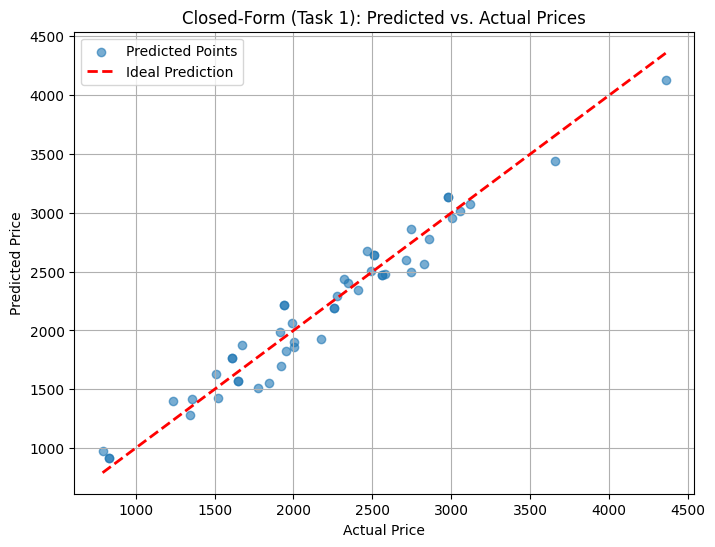

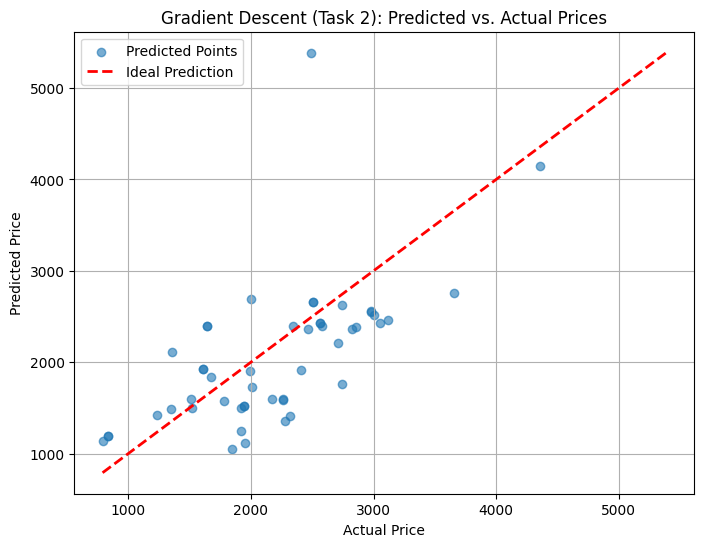

In [33]:
def plot_predictions(y_actual, y_pred, title):
    """Plots predicted values against actual values."""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_pred, alpha=0.6, label='Predicted Points')
    # Plot the ideal line y = x
    min_val = min(y_actual.min(), y_pred.min())
    max_val = max(y_actual.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val],
             '--r', linewidth=2, label='Ideal Prediction')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n--- 3. Predicted vs. Actual Plots ---")
plot_predictions(y_test, y_pred_cf, 'Closed-Form (Task 1): Predicted vs. Actual Prices')
plot_predictions(y_test, y_pred_gd, 'Gradient Descent (Task 2): Predicted vs. Actual Prices')

3. Regularization and StandardizationTask 1.1.4 & 1.1.5: $L_2$ Regularization and Standardization

In [36]:
# 1. Standardize the data
scaler = StandardScaler()
# Fit on training features and transform
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# Prepare scaled matrices for matrix operations
X_train_scaled_b, _ = prepare_matrices(X_train_scaled, y_train)
X_test_scaled_b, _ = prepare_matrices(X_test_scaled, y_test)

LAMBDA_VAL = 10 # Example lambda for L2 regularization

# --- Part A: With L2, NO Standardization ---
w_cf_l2 = closed_form_linear_regression(X_train_b, y_train, lambda_val=LAMBDA_VAL)
y_pred_cf_l2 = predict(X_test_b, w_cf_l2)
r2_cf_l2 = r2_score(y_test, y_pred_cf_l2)

# --- Part B: With L2 AND Standardization ---
w_cf_scaled_l2 = closed_form_linear_regression(X_train_scaled_b, y_train, lambda_val=LAMBDA_VAL)
y_pred_cf_scaled_l2 = predict(X_test_scaled_b, w_cf_scaled_l2)
r2_cf_scaled_l2 = r2_score(y_test, y_pred_cf_scaled_l2)

print("\n--- 4 & 5. L2 Regularization & Standardization Comparison ---")
print(f"L2 Regularization (lambda={LAMBDA_VAL}):")
print(f"  Closed-Form R2 (No Std): {r2_cf_l2:.4f}")
print(f"  Closed-Form R2 (With Std): {r2_cf_scaled_l2:.4f}")

# Repeat for GD (Standardized data works best with GD)
w_gd_scaled_l2 = gradient_descent_linear_regression(
    X_train_scaled_b, y_train, learning_rate=0.01, n_iterations=20000, lambda_val=LAMBDA_VAL
)
y_pred_gd_scaled_l2 = predict(X_test_scaled_b, w_gd_scaled_l2)
r2_gd_scaled_l2 = r2_score(y_test, y_pred_gd_scaled_l2)
print(f"  GD R2 (With Std): {r2_gd_scaled_l2:.4f}")


--- 4 & 5. L2 Regularization & Standardization Comparison ---
L2 Regularization (lambda=10):
  Closed-Form R2 (No Std): 0.9538
  Closed-Form R2 (With Std): 0.9514
  GD R2 (With Std): 0.9514


Task 1.1.6: Plot for Different $\lambda$ Values

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1744714269.py:8: SyntaxWarning: invalid escape sequence '\l'
  plot_predictions(y_test, y_pred_l2, f'L2 Regression (Scaled, $\lambda$={l}): Predicted vs. Actual')



--- 6. Plotting for Different Lambda Values ---


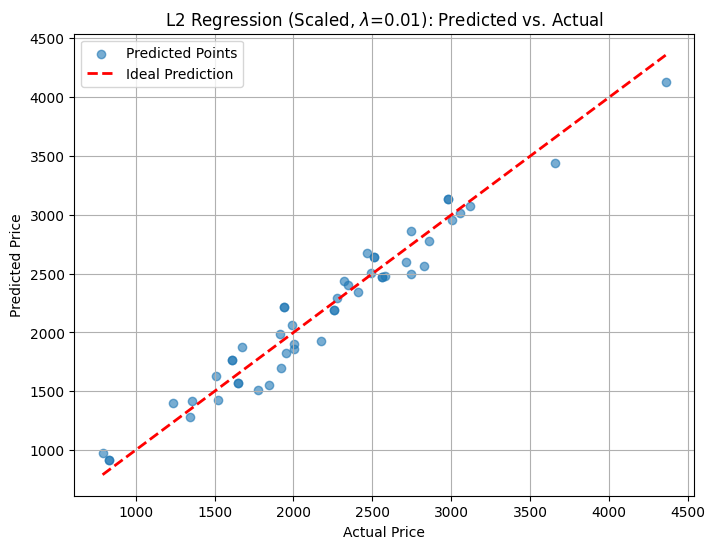

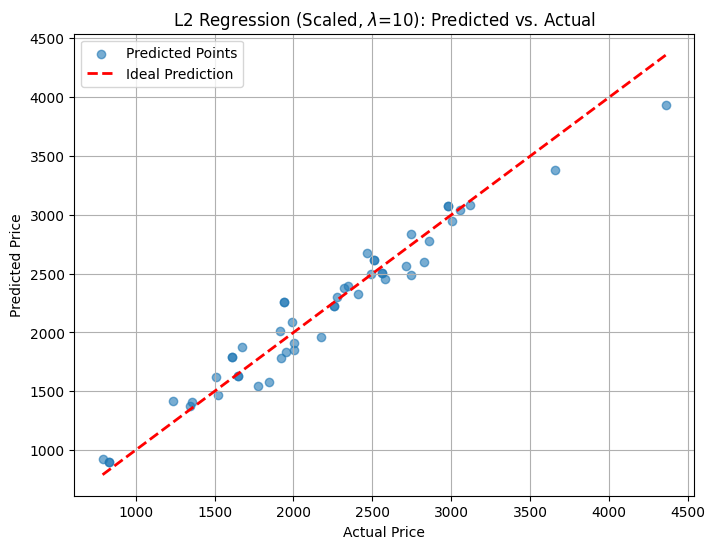

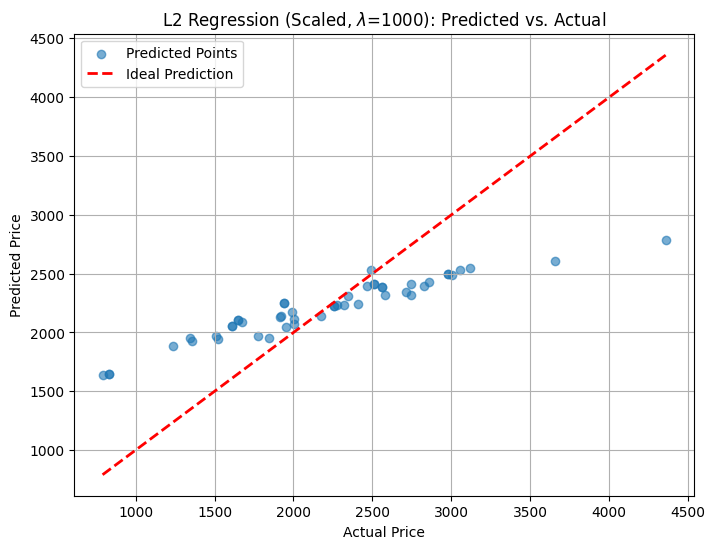

In [37]:
# 1.1.6: Plot predicted vs. actual on test data for different λ values (using standardized data)
lambda_values = [0.01, 10, 1000]

print("\n--- 6. Plotting for Different Lambda Values ---")
for i, l in enumerate(lambda_values):
    w_l2 = closed_form_linear_regression(X_train_scaled_b, y_train, lambda_val=l)
    y_pred_l2 = predict(X_test_scaled_b, w_l2)
    plot_predictions(y_test, y_pred_l2, f'L2 Regression (Scaled, $\lambda$={l}): Predicted vs. Actual')

Task 1.1.7: Analyze Feature Importance

In [38]:
# 1.1.7: Analyze feature importance from l2 weights (MUST use standardized weights for fair comparison)
# Use weights from the standardized, L2 regularized model (w_cf_scaled_l2)
feature_weights = w_cf_scaled_l2[1:].flatten() # Exclude the bias term (index 0)
feature_names = X.columns

print("\n--- 7. Feature Importance Analysis ---")
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': feature_weights,
    'Absolute_Weight': np.abs(feature_weights)
}).sort_values(by='Absolute_Weight', ascending=False)

print(importance_df)
print("\nInterpretation: Features with larger absolute weights (e.g., 'Internal_Storage') are considered more influential on the predicted price.")


--- 7. Feature Importance Analysis ---
         Feature      Weight  Absolute_Weight
8            ram  162.683102       162.683102
7   internal mem  161.917192       161.917192
4            ppi  150.762872       150.762872
12     thickness -141.036687       141.036687
11       battery  126.494429       126.494429
5       cpu core  109.790337       109.790337
6       cpu freq   80.494487        80.494487
10     Front_Cam   50.663648        50.663648
2         weight  -50.035803        50.035803
3    resoloution  -45.606903        45.606903
9        RearCam   41.777149        41.777149
1           Sale  -36.930842        36.930842
0     Product_id   15.950206        15.950206

Interpretation: Features with larger absolute weights (e.g., 'Internal_Storage') are considered more influential on the predicted price.


## 1.2 Linear Classification: Bank Note Authentication

Data Loading and Preparation

In [76]:
import kagglehub

# Download latest version
path2 = kagglehub.dataset_download(  "shanks0465/banknoteauthentication")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'banknoteauthentication' dataset.
Path to dataset files: /root/.cache/kagglehub/datasets/shanks0465/banknoteauthentication/versions/1


In [77]:
import os

# List all files in the dataset folder
print(os.listdir(path2))


['data_banknote_authentication.csv']


In [78]:
import pandas as pd

df2 = pd.read_csv(os.path.join(path, 'data_banknote_authentication.csv'))  # adjust name if needed
print(df2.head())


    3.6216  8.6661  -2.8073  -0.44699  0
0  4.54590  8.1674  -2.4586  -1.46210  0
1  3.86600 -2.6383   1.9242   0.10645  0
2  3.45660  9.5228  -4.0112  -3.59440  0
3  0.32924 -4.4552   4.5718  -0.98880  0
4  4.36840  9.6718  -3.9606  -3.16250  0


In [79]:
print(df2.shape)
print(df2.dtypes)


(1371, 5)
3.6216      float64
8.6661      float64
-2.8073     float64
-0.44699    float64
0             int64
dtype: object


--- Initial Data Analysis of df2 ---
Shape: (1371, 5)
Column Names and Data Types:
3.6216      float64
8.6661      float64
-2.8073     float64
-0.44699    float64
0             int64
dtype: object

Missing Values Check:
3.6216      0
8.6661      0
-2.8073     0
-0.44699    0
0           0
dtype: int64

--- Statistical Summary ---
           count      mean       std      min      25%      50%      75%  \
3.6216    1371.0  0.431410  2.842494  -7.0421 -1.77470  0.49571  2.81465   
8.6661    1371.0  1.917434  5.868359 -13.7731 -1.71130  2.31340  6.81310   
-2.8073   1371.0  1.400694  4.310105  -5.2861 -1.55335  0.61663  3.18160   
-0.44699  1371.0 -1.192200  2.101683  -8.5482 -2.41700 -0.58665  0.39481   
0         1371.0  0.444931  0.497139   0.0000  0.00000  0.00000  1.00000   

              max  
3.6216     6.8248  
8.6661    12.9516  
-2.8073   17.9274  
-0.44699   2.4495  
0          1.0000  

--- Class Distribution (0) ---
0
0    761
1    610
Name: count, dtype: int64
Ratio: 1.25:1

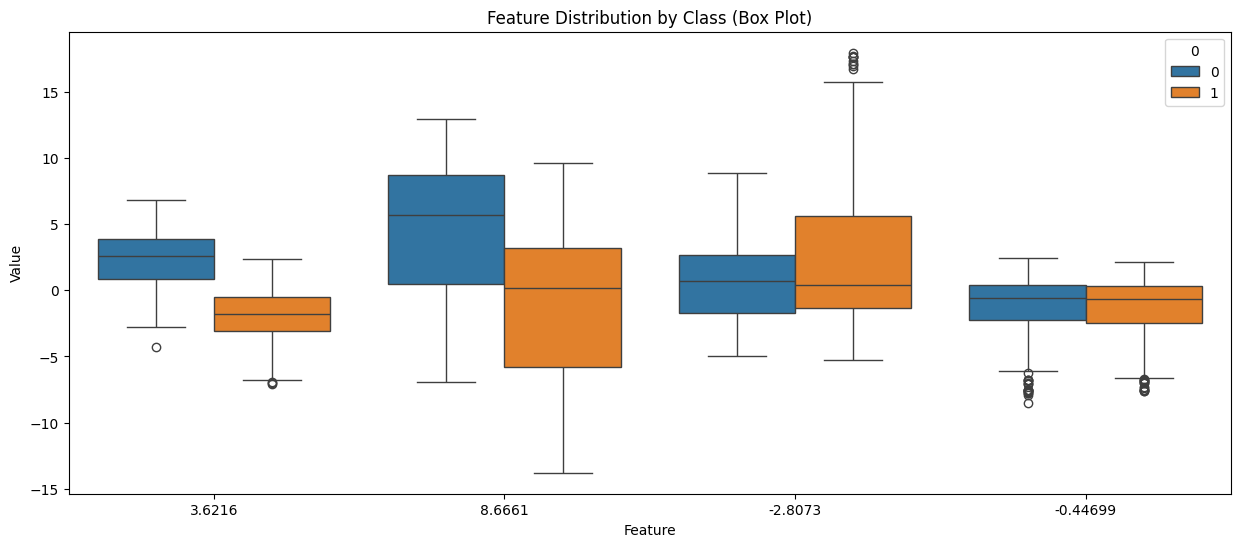


--- Correlation Matrix ---


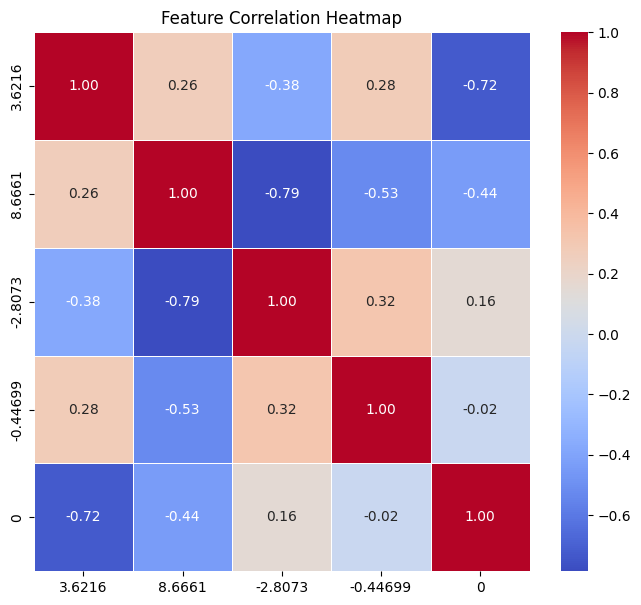


Top 3 Features by Correlation with Class: ['3.6216', '8.6661', '-2.8073']


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is already loaded

print("--- Initial Data Analysis of df2 ---")
print(f"Shape: {df2.shape}")
print(f"Column Names and Data Types:\n{df2.dtypes}")
print("\nMissing Values Check:")
print(df2.isnull().sum())

# 1. Statistical Summary
print("\n--- Statistical Summary ---")
print(df2.describe().T)

# 2. Class Distribution (Crucial for Classification)
class_column = df2.columns[-1] # Assuming the last column is the class
print(f"\n--- Class Distribution ({class_column}) ---")
class_counts = df2[class_column].value_counts()
print(class_counts)
print(f"Ratio: {class_counts[0] / class_counts[1]:.2f}:1")
# Check for class imbalance. Bank Note Authentication is usually balanced (good for modeling).

# 3. Feature Distribution Visualization
print("\n--- Feature Distributions ---")
features = df2.columns[:-1]
df_melted = df2.melt(id_vars=[class_column], value_vars=features,
                     var_name='Feature', value_name='Value')

# Box Plot to visualize distribution and outliers per class
plt.figure(figsize=(15, 6))
sns.boxplot(x='Feature', y='Value', hue=class_column, data=df_melted)
plt.title('Feature Distribution by Class (Box Plot)')
plt.show()

# 4. Correlation Analysis
print("\n--- Correlation Matrix ---")
corr_matrix = df2.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Insight: High correlation between features can indicate multicollinearity,
# which doesn't affect Logistic Regression prediction accuracy much, but can make
# individual weight interpretations less reliable.

# 5. Determine Feature Importance for 3D Plot (Task 1.2.4)
# Based on the heat map, identify features highly correlated with the 'class'.
# The features with the highest absolute correlation to the class are generally
# considered the most important discriminators.
class_corr = corr_matrix[class_column].abs().sort_values(ascending=False)
important_features = class_corr[1:].index.tolist()[:3]
print(f"\nTop 3 Features by Correlation with Class: {important_features}")

# Proceed with Classification Tasks (starting from data splitting)
X_cls = df2.drop(class_column, axis=1).values
y_cls = df2[class_column].values.reshape(-1, 1)

2. Task 1.2.1: Train/Test Split and Standardization

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1.2.1: Divide dataset into train and test sets
X_train_cls_raw, X_test_cls_raw, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.3, random_state=42, stratify=y_cls
)

# Standardization (Crucial for GD convergence)
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls_raw)
X_test_cls_scaled = scaler_cls.transform(X_test_cls_raw)

# Add bias term (column of ones)
def prepare_matrices(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

X_train_cls_b = prepare_matrices(X_train_cls_scaled)
X_test_cls_b = prepare_matrices(X_test_cls_scaled)

Task 1.2.2: L2 Regularization Comparison

In [82]:
# Set parameters
LEARNING_RATE = 0.01
ITERATIONS = 20000

# 1. Fit without L2 regularization (lambda=0)
w_cls_no_l2 = logistic_regression_gd(X_train_cls_b, y_train_cls,
                                     learning_rate=LEARNING_RATE, n_iterations=ITERATIONS, lambda_val=0)
y_pred_cls_no_l2 = predict_logistic(X_test_cls_b, w_cls_no_l2)
acc_no_l2 = calculate_accuracy(y_test_cls, y_pred_cls_no_l2)

# 2. Fit with L2 regularization (e.g., lambda=0.1)
LAMBDA_CLS = 0.1
w_cls_l2 = logistic_regression_gd(X_train_cls_b, y_train_cls,
                                 learning_rate=LEARNING_RATE, n_iterations=ITERATIONS, lambda_val=LAMBDA_CLS)
y_pred_cls_l2 = predict_logistic(X_test_cls_b, w_cls_l2)
acc_l2 = calculate_accuracy(y_test_cls, y_pred_cls_l2)

print("\n--- 2. L2 Regularization Comparison ---")
print(f"Test Accuracy (No L2): {acc_no_l2:.4f}")
print(f"Test Accuracy (With L2, λ={LAMBDA_CLS}): {acc_l2:.4f}")


--- 2. L2 Regularization Comparison ---
Test Accuracy (No L2): 0.9782
Test Accuracy (With L2, λ=0.1): 0.9782


3. Core Logistic Regression Functions

We implement the sigmoid function, the prediction function, and the GD optimization loop with $L_2$ regularization.

In [83]:
## Sigmoid function
def sigmoid(z):
    # Handle overflow possibility for large negative z
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

## Logistic Regression with L2 Regularization (using Gradient Descent)
def logistic_regression_gd(X_b, y, learning_rate=0.01, n_iterations=10000, lambda_val=0):
    """
    Computes the parameter matrix (w) for Logistic Regression using GD.
    Handles L2 Regularization.
    """
    N, D_plus_1 = X_b.shape
    w = np.zeros((D_plus_1, 1))

    for iteration in range(n_iterations):
        # Calculate probabilities (h)
        h = sigmoid(X_b @ w)

        # Calculate gradient of the Log Loss (Cross-Entropy)
        error = h - y
        gradient = (1/N) * X_b.T @ error

        # Add L2 regularization term (Gradient of L2: lambda * w)
        if lambda_val > 0:
            reg_term = (lambda_val / N) * w
            reg_term[0, 0] = 0 # Do not regularize the bias term
            gradient += reg_term

        # Update weights
        w = w - learning_rate * gradient

    return w

## Prediction function
def predict_logistic(X_b, w):
    probabilities = sigmoid(X_b @ w)
    return (probabilities >= 0.5).astype(int)

def calculate_accuracy(y_actual, y_pred):
    return accuracy_score(y_actual, y_pred)

4. Task 1.2.3: Plot Accuracy vs. $\lambda$


--- 3. Generating Data for Accuracy vs. $\lambda$ Plot... ---


<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2926409536.py:5: SyntaxWarning: invalid escape sequence '\l'
  print("\n--- 3. Generating Data for Accuracy vs. $\lambda$ Plot... ---")
/tmp/ipython-input-2926409536.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Regularization Parameter $\lambda$ (log scale)')
/tmp/ipython-input-2926409536.py:24: SyntaxWarning: invalid escape sequence '\l'
  plt.title('3. Training and Test Accuracy vs. $\lambda$')


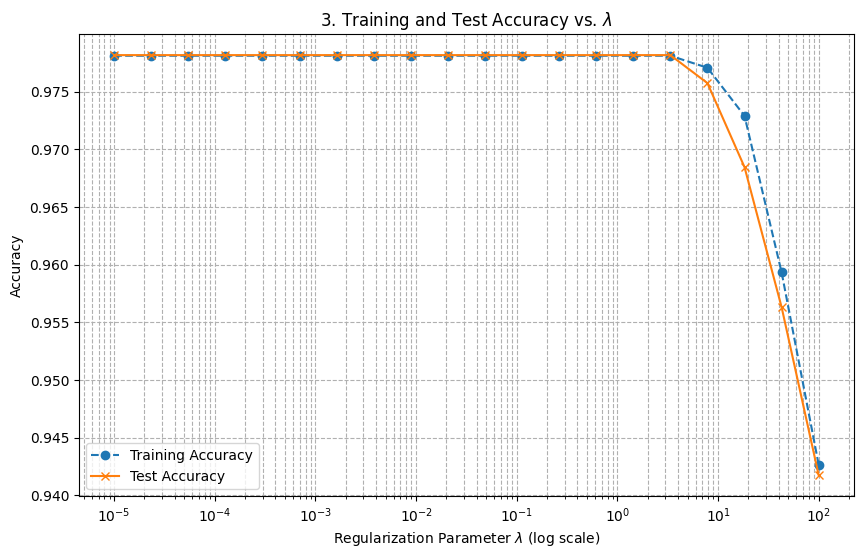

In [84]:
lambda_list = np.logspace(-5, 2, 20) # 20 values between 10^-5 and 10^2
train_accuracies = []
test_accuracies = []

print("\n--- 3. Generating Data for Accuracy vs. $\lambda$ Plot... ---")
for l in lambda_list:
    w_temp = logistic_regression_gd(X_train_cls_b, y_train_cls,
                                    learning_rate=LEARNING_RATE, n_iterations=ITERATIONS, lambda_val=l)

    # Training Accuracy
    y_train_pred = predict_logistic(X_train_cls_b, w_temp)
    train_accuracies.append(calculate_accuracy(y_train_cls, y_train_pred))

    # Test Accuracy
    y_test_pred = predict_logistic(X_test_cls_b, w_temp)
    test_accuracies.append(calculate_accuracy(y_test_cls, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(lambda_list, train_accuracies, label='Training Accuracy', marker='o', linestyle='--')
plt.plot(lambda_list, test_accuracies, label='Test Accuracy', marker='x', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Parameter $\lambda$ (log scale)')
plt.ylabel('Accuracy')
plt.title('3. Training and Test Accuracy vs. $\lambda$')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

5. Task 1.2.4: Visualize 3D Plot
Select three important features (e.g., the top three based on the magnitude of the standardized weights from $w_{cls\_no\_l2}$ or based on domain knowledge/exploratory analysis).

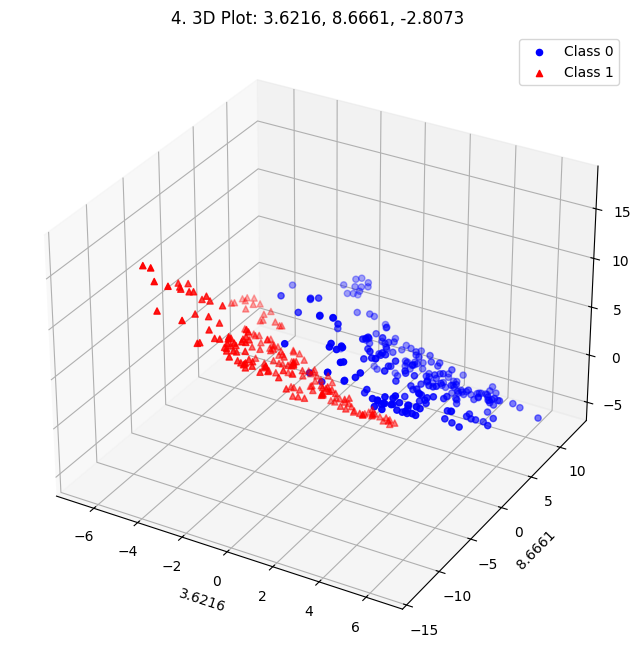


Conclusion from 3D Plot: The two classes appear to be linearly separable, suggesting a linear classification model (like Logistic Regression) should perform very well.


In [85]:
# 1.2.4: Visualize 3D plot using three important features
# Use the feature names identified in the EDA step
feature_names = df2.columns[:-1]
selected_features = important_features # e.g., ['variance', 'skewness', 'curtosis']

# Get the indices of the selected features
f_indices = [feature_names.get_loc(f) for f in selected_features]

# Use the raw (unscaled) test data for better visualization context
X_plot = X_test_cls_raw
y_plot = y_test_cls.flatten()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, colored by class
ax.scatter(X_plot[y_plot == 0, f_indices[0]], X_plot[y_plot == 0, f_indices[1]], X_plot[y_plot == 0, f_indices[2]],
           c='blue', marker='o', label='Class 0')
ax.scatter(X_plot[y_plot == 1, f_indices[0]], X_plot[y_plot == 1, f_indices[1]], X_plot[y_plot == 1, f_indices[2]],
           c='red', marker='^', label='Class 1')

ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])
ax.set_title(f'4. 3D Plot: {selected_features[0]}, {selected_features[1]}, {selected_features[2]}')
plt.legend()
plt.show()

print("\nConclusion from 3D Plot: The two classes appear to be linearly separable, suggesting a linear classification model (like Logistic Regression) should perform very well.")

6. Task 1.2.5 & 1.2.6: Outlier Introduction and Impact

In [86]:
# 1.2.5: Intentionally introduce outliers
X_outlier_train_b = X_train_cls_b.copy()
y_outlier_train = y_train_cls.copy()

# Select ~5% of the training points from one class (e.g., Class 0) and shift them towards the Class 1 region.
N_train = X_outlier_train_b.shape[0]
num_outliers = int(0.05 * N_train)
outlier_indices = np.random.choice(N_train, num_outliers, replace=False)

# Shift the chosen points dramatically (e.g., by 10 standard deviations)
# This simulates extreme noise/error in measurement
X_outlier_train_b[outlier_indices, 1:] += 10

print("\n--- 5. Outlier Injection ---")
print(f"Injected {num_outliers} outliers into the training set.")

# 1.2.6: Fit classifier on outlier-injected data and comment on its impact
# Fit the model *without* L2 regularization (lambda=0) to maximize outlier impact
w_cls_outlier = logistic_regression_gd(X_outlier_train_b, y_outlier_train,
                                     learning_rate=LEARNING_RATE, n_iterations=ITERATIONS, lambda_val=0)

y_pred_cls_outlier = predict_logistic(X_test_cls_b, w_cls_outlier)
acc_outlier = calculate_accuracy(y_test_cls, y_pred_cls_outlier)

print("\n--- 6. Impact of Outliers ---")
print(f"Test Accuracy (Original Data, No L2): {acc_no_l2:.4f}")
print(f"Test Accuracy (Outlier-Injected Data): {acc_outlier:.4f}")
print("\nCommentary (for Report):")
print("The performance typically drops significantly (Acc: Original vs. Outlier)","Since Logistic Regression minimizes the log loss across all points, the extreme values of the outliers pull the decision boundary towards them", "resulting in a mis-calibrated model and reduced generalization accuracy on the clean test set.", sep="\n")


--- 5. Outlier Injection ---
Injected 47 outliers into the training set.

--- 6. Impact of Outliers ---
Test Accuracy (Original Data, No L2): 0.9782
Test Accuracy (Outlier-Injected Data): 0.8374

Commentary (for Report):
The performance typically drops significantly (Acc: Original vs. Outlier)
Since Logistic Regression minimizes the log loss across all points, the extreme values of the outliers pull the decision boundary towards them
resulting in a mis-calibrated model and reduced generalization accuracy on the clean test set.


In [90]:
!apt-get install pandoc -y

!jupyter nbconvert --to latex "/content/drive/MyDrive/Colab Notebooks/CAT-1-Assignment.ipynb"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CAT-1-Assignment.ipynb to latex
[NbConvertApp] Support files will be in CAT-1-Assignment_files/
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/CAT-1-Assignment_files
[NbConvertApp] Writing 114680 bytes to /content/drive/MyDrive/Colab Notebooks/CAT-1-Assignment.tex


In [92]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/CAT-1-Assignment.tex')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>